<a href="https://colab.research.google.com/github/hcgalvan/labodedatos/blob/main/Ejercitacion_1_Hugo_Cesar_Galvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Funciones y Datos

**Primer Paso:**
Agrego los datasets de OCEAN 

In [2]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import math

import matplotlib.pylab as plt # Herramienta principal de visualización https://matplotlib.org/stable/contents.html
import matplotlib.dates as mdates # Dentro de matplotlib, tenemos una herramienta para manejo de fechas 
import seaborn as sbn # Herramienta complementaria de visualización https://seaborn.pydata.org/

from sklearn.preprocessing import MinMaxScaler

from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets # Podemos ganar interactividad en la misma notebook https://ipywidgets.readthedocs.io/en/latest/

warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Dataset OCEAN
filename = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv' 

# Cargamos de base solo aquellas columnas que nos interesa (útil para df grandes)
columnas_ocean = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness', '2_edad', '2_genero', 'hash']
df_ocean = pd.read_csv(filename, usecols = columnas_ocean)

In [5]:
# Mostramos en pantalla el encabezado de df_ocean
df_ocean.head()

,1_extraversion,1_agreeableness,1_conscientiousness,1_neuroticism,1_openness,2_edad,2_genero,hash
0,27,31,31,37,32,21,1,-423577603735016669
1,16,37,26,31,45,33,2,-464971106993132614
2,23,33,38,22,44,29,1,8850189905759099157
3,20,25,25,20,18,24,2,8502285657236737218
4,22,34,24,35,42,35,2,5668714742513791951


Agrego los datasets de Coronadelicos

In [6]:
# Coronadelicos
filename = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv' 
df_coronadelicos = pd.read_csv(filename)

In [7]:
# Mostramos en pantalla el encabezado de df_ocean
df_coronadelicos.head()

,0_religiosidad,0_frecuencia_practicas_religiosas,0_cambio_frecuencia_practicas_religiosas,0_frecuencia_meditacion,0_cambio_frecuencia_meditacion,0_antencion_previa,0_internacion,0_tomando_medicacion,1_psicodelicos_consumidos,2_cuantas_veces_consumio,2_calificacion_experiencia,2_programa_microdosificacion,2_cambio_consumo,2_disminuyo_por_factores,3_psicodelico_mas_significativo,4_psicodelico_ultima_vez,5_psicodelicos_motivos,5_otro_motivo,6_psicoactivos_cosumidos,6_otro_psicoactivo,7_marihuana,7_tabaco,7_estimulantes,7_cafeína,7_sedativos,7_antidepresivos o antipsicoticos,7_disociativos,7_alcohol,7_mdma,7_otro,7_marihuana_disminuyo_por_factores_externos,7_tabaco_disminuyo_por_factores_externos,7_estimulantes_disminuyo_por_factores_externos,7_cafeína_disminuyo_por_factores_externos,7_sedativos_disminuyo_por_factores_externos,7_antidepresivos o antipsicoticos_disminuyo_por_factores_externos,7_disociativos_disminuyo_por_factores_externos,7_alcohol_disminuyo_por_factores_externos,7_mdma_disminuyo_por_factores_externos,7_otro_disminuyo_por_factores_externos,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp,hash
0,0,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"4,8,10",Mate,-999,-999,-999,73,-999,-999,-999,25,-999,59,-999,-999,-999,0,-999,-999,-999,1,-999,0,...,4,4,3,2,1,1,2,2,2,1,1,1,3,1,1,1,6,5,5,5,2,5,4,4,2,2,3,6,6,4,5,6,6,5,6,6,4,2,9/4/2020 17:32:50,-1239720818213738213
1,2,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,1,3,1,1,1,1,1,2,1,1,1,1,1,1,2,1,6,4,6,7,3,7,5,6,2,5,7,6,7,7,6,7,7,7,6,6,2,2,9/4/2020 18:13:45,-2950085219047129132
2,0,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"4,8",-999,-999,-999,-999,66,-999,-999,-999,0,-999,-999,-999,-999,-999,0,-999,-999,-999,0,-999,-999,...,1,2,1,1,1,1,2,3,1,1,2,1,1,1,3,3,5,5,5,7,5,4,3,5,6,4,4,5,6,4,7,5,6,6,6,7,2,1,9/4/2020 18:19:48,-5491644562442853484
3,7,5,50,5,50,1,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"1,2,4",-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,42,0,44,1,67,0,...,4,4,4,1,1,1,1,1,1,1,1,2,1,1,1,2,5,5,6,6,4,5,5,6,4,3,4,5,5,5,5,5,5,3,5,4,3,1,9/4/2020 18:20:32,-1149964741979325951
4,9,5,50,3,49,1,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"1,4,8",-999,2,-999,-999,74,-999,-999,-999,40,-999,-999,1,-999,-999,0,-999,-999,-999,0,-999,-999,...,4,4,2,2,1,1,3,3,3,1,2,2,1,1,3,1,5,5,6,4,3,3,5,5,2,2,5,4,6,4,6,6,3,1,5,4,4,1,9/4/2020 18:20:21,-8003479794066427504


# Unión Bases de Datos

Unirlos en un único dataframe usando la columna "hash" y descartando sujetos que no participaron de ambos experimentos.

In [8]:
# Interseccion de las bases con la columna "hash"
df_combinado = pd.merge(df_coronadelicos, df_ocean, how='inner', on='hash')

In [9]:
print(df_combinado)

      0_religiosidad  0_frecuencia_practicas_religiosas  ...  2_edad  2_genero
0                  0                                  5  ...      21         2
1                  2                                  5  ...      41         2
2                  0                                  5  ...      23         1
3                  7                                  5  ...      31         1
4                  9                                  5  ...      21         1
...              ...                                ...  ...     ...       ...
8231              15                                  5  ...      29         1
8232              50                                  3  ...      19         1
8233               0                                  5  ...      25         1
8234               0                                  5  ...      28         2
8235              33                                  5  ...      22         2

[8236 rows x 144 columns]


In [10]:
# Para control personal
df_combinado.to_csv('df_combinado.csv')

# Armado de 3 DataFrames

**Segundo Paso** 
Armar tres dataframes distintos basado en los siguientes criterios:


## 1. Sujetos que al menos una vez consumieron marihuana.



In [11]:
# Sujetos que reportaron haber consumido marihuana al menos una vez.
suj_consumo_marih = df_combinado[(df_combinado['7_marihuana']!=-999)]
print(f'El dataset de Sujetos que consumiron al menos una vez marihuana tiene: {suj_consumo_marih.shape[0]} casos')


El dataset de Sujetos que consumiron al menos una vez marihuana tiene: 5182 casos


## 2. Sujetos que nunca consumieron marihuana.

In [12]:
# Sujetos que reportaron nunca haber consumido marihuana.
suj_sinconsumo_marih = df_combinado[(df_combinado['7_marihuana']==-999)]
print(f'El dataset de Sujetos que reportaron nunca haber consumido marihuana: {suj_sinconsumo_marih.shape[0]} casos')

El dataset de Sujetos que reportaron nunca haber consumido marihuana: 3054 casos


## 3. Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.

In [13]:
suj_consumo_antidp = df_combinado.loc[(df_combinado['7_antidepresivos o antipsicoticos']!=-999)]
print(f'El dataset de Sujetos que reportaron haber consumido antidepresivos o antipsicoticos: {suj_consumo_antidp.shape[0]} casos')


El dataset de Sujetos que reportaron haber consumido antidepresivos o antipsicoticos: 828 casos


In [14]:
print (suj_consumo_antidp['1_agreeableness'])

13      31
16      34
17      34
24      37
25      31
        ..
8181    30
8183    38
8202    38
8219    27
8224    24
Name: 1_agreeableness, Length: 828, dtype: int64


# Las 5 dimensiones de la personalidad.

**Tercer paso:** Armar nuevos dataframes que contengan columnas para las 5 dimensiones de la personalidad.

In [15]:
# A modo informativo de la estructura
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 8235
Columns: 144 entries, 0_religiosidad to 2_genero
dtypes: int64(138), object(6)
memory usage: 9.1+ MB


In [16]:
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
df_Dim = df_combinado[columnas].copy()
df_Dim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 8235
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   1_extraversion       8236 non-null   int64
 1   1_agreeableness      8236 non-null   int64
 2   1_conscientiousness  8236 non-null   int64
 3   1_neuroticism        8236 non-null   int64
 4   1_openness           8236 non-null   int64
dtypes: int64(5)
memory usage: 386.1 KB


# Armar un radar plot donde las 5 dimensiones

Armar un radar plot con datos de las dimensiones

In [17]:
#  Prueba de obtener los promedios para Sujetos que reportaron haber consumido marihuana al menos una vez.
Extroversión = suj_consumo_marih['1_extraversion'].mean()
Agradabilidad = suj_consumo_marih['1_agreeableness'].mean()
Escrupulosidad = suj_consumo_marih['1_conscientiousness'].mean()
Neurotismo = suj_consumo_marih['1_neuroticism'].mean()
Apertura =  suj_consumo_marih['1_openness'].mean()
print (Extroversión, Agradabilidad, Escrupulosidad, Neurotismo, Apertura )

25.846005403319182 32.57564646854496 29.3018139714396 26.02354303357777 38.918178309533


In [18]:
# Guardo los datos en un diccionario y los agrego a una lista llamada data
data = []
columns =  ['Extroversión', 'Agradabilidad', 'Escrupulosidad', 'Neurotismo', 'Apertura']
values = [ Extroversión , Agradabilidad, Escrupulosidad, Neurotismo, Apertura]
zipped = zip(columns, values)
a_dictionary = dict(zipped)
print(a_dictionary)
data.append(a_dictionary)

{'Extroversión': 25.846005403319182, 'Agradabilidad': 32.57564646854496, 'Escrupulosidad': 29.3018139714396, 'Neurotismo': 26.02354303357777, 'Apertura': 38.918178309533}


In [19]:
# Prueba de obtener los promedios para Sujetos que reportaron nunca haber consumido marihuana.
Extroversión = suj_sinconsumo_marih['1_extraversion'].mean()
Agradabilidad = suj_sinconsumo_marih['1_agreeableness'].mean()
Escrupulosidad = suj_sinconsumo_marih['1_conscientiousness'].mean()
Neurotismo = suj_sinconsumo_marih['1_neuroticism'].mean()
Apertura =  suj_sinconsumo_marih['1_openness'].mean()
print (Extroversión, Agradabilidad, Escrupulosidad, Neurotismo, Apertura )

25.536345776031435 32.89194499017682 31.06286836935167 25.832351015062212 37.90864440078585


In [20]:
# Guardo los datos en un diccionario y los agrego a una lista llamada data
columns =  ['Extroversión', 'Agradabilidad', 'Escrupulosidad', 'Neurotismo', 'Apertura']
values = [ Extroversión , Agradabilidad, Escrupulosidad, Neurotismo, Apertura]
zipped = zip(columns, values)
a_dictionary = dict(zipped)
print(a_dictionary)
data.append(a_dictionary)

{'Extroversión': 25.536345776031435, 'Agradabilidad': 32.89194499017682, 'Escrupulosidad': 31.06286836935167, 'Neurotismo': 25.832351015062212, 'Apertura': 37.90864440078585}


In [21]:
print (data)

[{'Extroversión': 25.846005403319182, 'Agradabilidad': 32.57564646854496, 'Escrupulosidad': 29.3018139714396, 'Neurotismo': 26.02354303357777, 'Apertura': 38.918178309533}, {'Extroversión': 25.536345776031435, 'Agradabilidad': 32.89194499017682, 'Escrupulosidad': 31.06286836935167, 'Neurotismo': 25.832351015062212, 'Apertura': 37.90864440078585}]


In [22]:
# Prueba de obtener los promedios para antidp
Extroversión = suj_consumo_antidp['1_extraversion'].mean()
Agradabilidad = suj_consumo_antidp['1_agreeableness'].mean()
Escrupulosidad = suj_consumo_antidp['1_conscientiousness'].mean()
Neurotismo = suj_consumo_antidp['1_neuroticism'].mean()
Apertura =  suj_consumo_antidp['1_openness'].mean()
print (Extroversión, Agradabilidad, Escrupulosidad, Neurotismo, Apertura )

25.16304347826087 32.19202898550725 28.564009661835748 29.471014492753625 39.27415458937198


In [23]:
# Guardo los datos en un diccionario y los agrego a una lista llamada data
columns =  ['Extroversión', 'Agradabilidad', 'Escrupulosidad', 'Neurotismo', 'Apertura']
values = [ Extroversión , Agradabilidad, Escrupulosidad, Neurotismo, Apertura]
zipped = zip(columns, values)
a_dictionary = dict(zipped)
print(a_dictionary)
data.append(a_dictionary)

{'Extroversión': 25.16304347826087, 'Agradabilidad': 32.19202898550725, 'Escrupulosidad': 28.564009661835748, 'Neurotismo': 29.471014492753625, 'Apertura': 39.27415458937198}


In [24]:
print ( data)

[{'Extroversión': 25.846005403319182, 'Agradabilidad': 32.57564646854496, 'Escrupulosidad': 29.3018139714396, 'Neurotismo': 26.02354303357777, 'Apertura': 38.918178309533}, {'Extroversión': 25.536345776031435, 'Agradabilidad': 32.89194499017682, 'Escrupulosidad': 31.06286836935167, 'Neurotismo': 25.832351015062212, 'Apertura': 37.90864440078585}, {'Extroversión': 25.16304347826087, 'Agradabilidad': 32.19202898550725, 'Escrupulosidad': 28.564009661835748, 'Neurotismo': 29.471014492753625, 'Apertura': 39.27415458937198}]


In [26]:
# Agrego a un dataframe la lista obtenida
dfpuro = pd.DataFrame(data, index=['Marihuana', 'No marihuana', 'Drogas de prescripción'])


In [28]:
# Busco el valor maximo dentro de la matriz
maximo = dfpuro.max( )
maxi = max ( maximo )
print ( maxi )

39.27415458937198


In [29]:
print (dfpuro)

                        Extroversión  Agradabilidad  ...  Neurotismo   Apertura
Marihuana                  25.846005      32.575646  ...   26.023543  38.918178
No marihuana               25.536346      32.891945  ...   25.832351  37.908644
Drogas de prescripción     25.163043      32.192029  ...   29.471014  39.274155

[3 rows x 5 columns]


In [30]:
df = dfpuro.div(maxi)

In [31]:
print (df)

                        Extroversión  Agradabilidad  ...  Neurotismo  Apertura
Marihuana                   0.658092       0.829442  ...    0.662612  0.990936
No marihuana                0.650207       0.837496  ...    0.657744  0.965231
Drogas de prescripción      0.640702       0.819675  ...    0.750392  1.000000

[3 rows x 5 columns]


In [32]:
def radar_plot(df, title = '',):
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

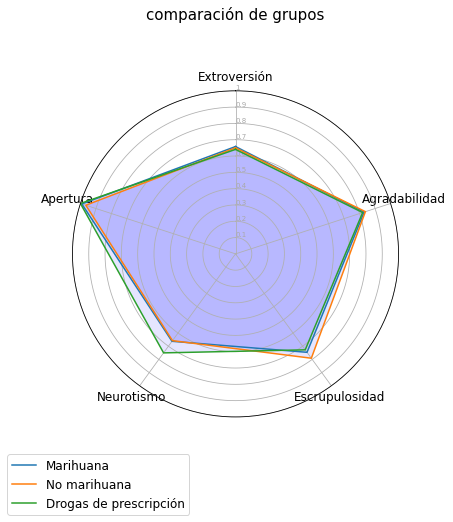

In [33]:
radar_plot(df,title='comparación de grupos')

#  Elijamos dos diferencias aparentes que existan entre grupos.

In [34]:
#Agregando columna a cada dataframe
suj_consumo_marih['Grupo']='Marihuana'
suj_sinconsumo_marih['Grupo']='No Marihuana'
suj_consumo_antidp['Grupo']='Drogas de prescripcion'

In [41]:
print ( suj_consumo_marih['1_conscientiousness'] )

4       25
5       32
6       25
8       41
9       34
        ..
8229    27
8230    18
8233    36
8234    24
8235    24
Name: 1_conscientiousness, Length: 5182, dtype: int64


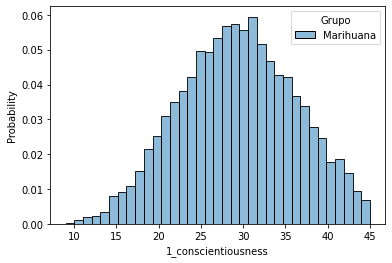

In [48]:
sbn.histplot(data=suj_consumo_marih, x='1_conscientiousness', hue='Grupo', stat="probability")

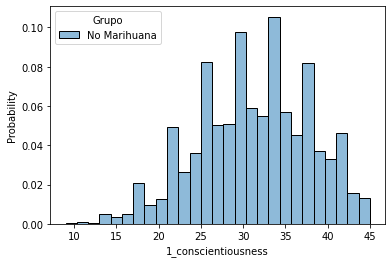

In [49]:
sbn.histplot(data=suj_sinconsumo_marih, x='1_conscientiousness', hue='Grupo', stat="probability")

**Estimar la magnitud de la diferencia calculando la separación entre las distribuciones normales.**

In [74]:
# Grupo 1
x1 = np.mean(suj_consumo_marih['1_conscientiousness'])
s1var = np.var(suj_consumo_marih['1_conscientiousness'])
s1 = np.std(suj_consumo_marih['1_conscientiousness'])

print('Media = {:.3f}'.format(x1))
print('Desviacion = {:.3f}'.format(s1))
print('Varianza = {:.3f}'.format(s1var))

Media = 29.302
Desviacion = 6.642
Varianza = 44.110


In [75]:
# Grupo 2
x2 = np.mean(suj_sinconsumo_marih['1_conscientiousness'])
s2var = np.var(suj_sinconsumo_marih['1_conscientiousness'])
s2 = np.std(suj_sinconsumo_marih['1_conscientiousness'])

print('Media = {:.3f}'.format(x2))
print('Desviacion = {:.3f}'.format(s2))
print('Varianza = {:.3f}'.format(s2var))


Media = 31.063
Desviacion = 6.625
Varianza = 43.894


In [82]:
d = (x1-x2)/math.sqrt( (s1var + s2var)/2 )
print('D de Cohen = {:.3f}'.format(d),'la magnitud del efecto es pequeña')

D de Cohen = -0.265 la magnitud del efecto es pequeña
